In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('netflix_titles.csv')

In [36]:
data.head(15)

,show_id,type,movie_title,director_name,actor_1_name,actor_2_name,Unnamed: 6,actor_3_name,title_year,duration,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Kimiko Glenn,NaN,James Marsden,2021,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Oyafunmike Ogunlano,NaN,Alexandra Duah,1993,125 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,Chris O'Dowd,NaN,Kevin Kline,2021,104 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s13,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Jannis Niewöhner,NaN,Milan Peschel,2021,127 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Klara Castanho,Lucca Picon,NaN,Júlia Gomes,2021,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,NaN,NaN,2020,67 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,s19,Movie,Intrusion,Adam Salky,Freida Pinto,Logan Marshall-Green,NaN,Robert John Burke,2021,94 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,Meena,NaN,Gemini Ganesan,1996,161 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore",Maisie Benson,Paul Killam,NaN,Kerry Gudjohnsen,2021,61 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,s25,Movie,Jeans,S. Shankar,Prashanth,Aishwarya Rai Bachchan,NaN,Sri Lakshmi,1998,166 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.shape

(6130, 46)

In [38]:
data.columns

Index(['show_id', 'type', 'movie_title', 'director_name', 'actor_1_name',
       'actor_2_name', 'Unnamed: 6', 'actor_3_name', 'title_year', 'duration',
       'genres', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45'],
      dtype='object')

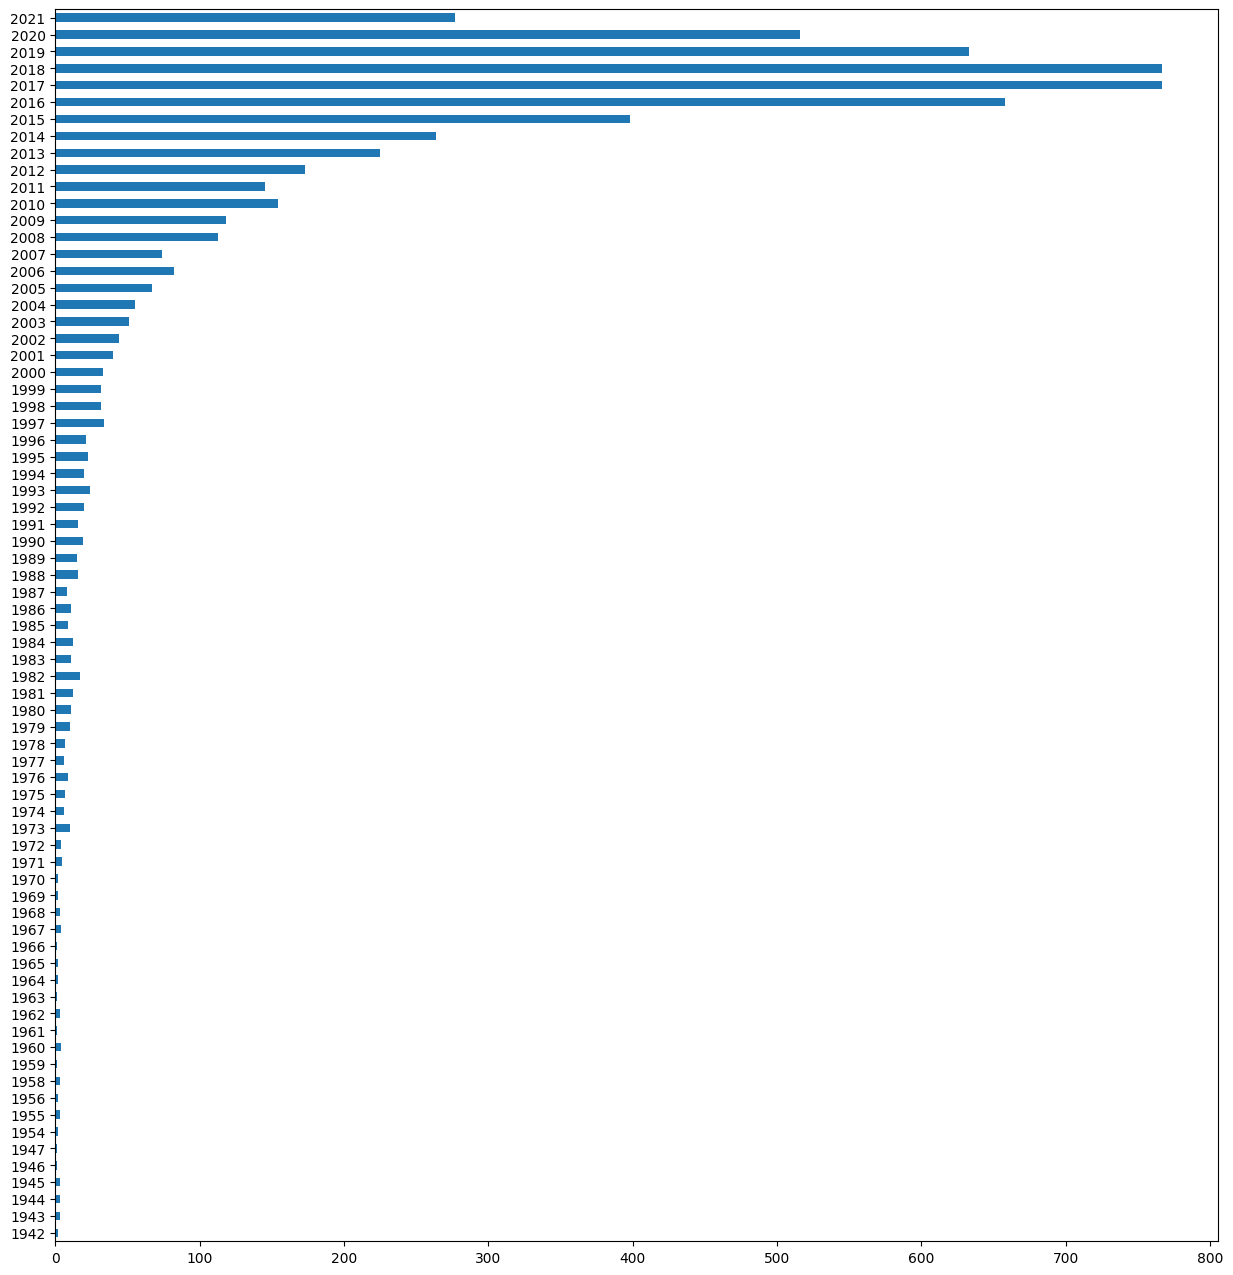

In [40]:
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [42]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [43]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Kimiko Glenn,James Marsden,Children & Family Movies,My Little Pony: A New Generation
1,Haile Gerima,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,"Dramas, Independent Movies, International Movies",Sankofa
2,Theodore Melfi,Melissa McCarthy,Chris O'Dowd,Kevin Kline,"Comedies, Dramas",The Starling
3,Christian Schwochow,Luna Wedler,Jannis Niewöhner,Milan Peschel,"Dramas, International Movies",Je Suis Karl
4,Bruno Garotti,Klara Castanho,Lucca Picon,Júlia Gomes,"Children & Family Movies, Comedies",Confessions of an Invisible Girl
5,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,NaN,"Documentaries, International Movies",Europe's Most Dangerous Man: Otto Skorzeny in ...
6,Adam Salky,Freida Pinto,Logan Marshall-Green,Robert John Burke,Thrillers,Intrusion
7,K.S. Ravikumar,Kamal Hassan,Meena,Gemini Ganesan,"Comedies, International Movies",Avvai Shanmughi
8,"Alex Woo, Stanley Moore",Maisie Benson,Paul Killam,Kerry Gudjohnsen,Children & Family Movies,Go! Go! Cory Carson: Chrissy Takes the Wheel
9,S. Shankar,Prashanth,Aishwarya Rai Bachchan,Sri Lakshmi,"Comedies, International Movies, Romantic Movies",Jeans


In [61]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')
data['genres'] = data['genres'].replace(np.nan, 'unknown')

In [62]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Kimiko Glenn,James Marsden,Children Family,my little pony: a new generation
1,Haile Gerima,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,Drama Independent International,sankofa
2,Theodore Melfi,Melissa McCarthy,Chris O'Dowd,Kevin Kline,Comedy Drama,the starling
3,Christian Schwochow,Luna Wedler,Jannis Niewöhner,Milan Peschel,Drama International,je suis karl
4,Bruno Garotti,Klara Castanho,Lucca Picon,Júlia Gomes,Children Family Comedy,confessions of an invisible girl
...,...,...,...,...,...,...
6125,Majid Al Ansari,Ali Suliman,Saleh Bakri,Yasa,Drama International Thriller,zinzana
6126,David Fincher,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Cult Drama Thriller,zodiac
6127,Ruben Fleischer,Jesse Eisenberg,Woody Harrelson,Emma Stone,Comedy Horror,zombieland
6128,Peter Hewitt,Tim Allen,Courteney Cox,Chevy Chase,Children Family Comedy,zoom


In [63]:
data['genres'] = data['genres'].str.replace('&', ' ')
data['genres'] = data['genres'].str.replace(',', ' ')
data['genres'] = data['genres'].str.replace('Movies', ' ')
data['genres'] = data['genres'].str.replace('Comedies', 'Comedy')
data['genres'] = data['genres'].str.replace('Dramas', 'Drama')
data['genres'] = data['genres'].str.replace('Thrillers', 'Thriller')

In [64]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Kimiko Glenn,James Marsden,Children Family,my little pony: a new generation
1,Haile Gerima,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,Drama Independent International,sankofa
2,Theodore Melfi,Melissa McCarthy,Chris O'Dowd,Kevin Kline,Comedy Drama,the starling
3,Christian Schwochow,Luna Wedler,Jannis Niewöhner,Milan Peschel,Drama International,je suis karl
4,Bruno Garotti,Klara Castanho,Lucca Picon,Júlia Gomes,Children Family Comedy,confessions of an invisible girl
...,...,...,...,...,...,...
6125,Majid Al Ansari,Ali Suliman,Saleh Bakri,Yasa,Drama International Thriller,zinzana
6126,David Fincher,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Cult Drama Thriller,zodiac
6127,Ruben Fleischer,Jesse Eisenberg,Woody Harrelson,Emma Stone,Comedy Horror,zombieland
6128,Peter Hewitt,Tim Allen,Courteney Cox,Chevy Chase,Children Family Comedy,zoom


In [65]:
data['movie_title'] = data['movie_title'].str.lower()

In [67]:
data['movie_title'][1]

'sankofa'

In [70]:
data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name'] + ' '+ data['actor_3_name'] + ' '+ data['director_name'] +' ' + data['genres']

In [71]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,Kimiko Glenn,James Marsden,Children Family,my little pony: a new generation,Vanessa Hudgens Kimiko Glenn James Marsden R...
1,Haile Gerima,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,Drama Independent International,sankofa,Kofi Ghanaba Oyafunmike Ogunlano Alexandra D...
2,Theodore Melfi,Melissa McCarthy,Chris O'Dowd,Kevin Kline,Comedy Drama,the starling,Melissa McCarthy Chris O'Dowd Kevin Kline Th...
3,Christian Schwochow,Luna Wedler,Jannis Niewöhner,Milan Peschel,Drama International,je suis karl,Luna Wedler Jannis Niewöhner Milan Peschel C...
4,Bruno Garotti,Klara Castanho,Lucca Picon,Júlia Gomes,Children Family Comedy,confessions of an invisible girl,Klara Castanho Lucca Picon Júlia Gomes Bruno...
...,...,...,...,...,...,...,...
6125,Majid Al Ansari,Ali Suliman,Saleh Bakri,Yasa,Drama International Thriller,zinzana,Ali Suliman Saleh Bakri Yasa Majid Al Ansari...
6126,David Fincher,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Cult Drama Thriller,zodiac,Mark Ruffalo Jake Gyllenhaal Robert Downey J...
6127,Ruben Fleischer,Jesse Eisenberg,Woody Harrelson,Emma Stone,Comedy Horror,zombieland,Jesse Eisenberg Woody Harrelson Emma Stone R...
6128,Peter Hewitt,Tim Allen,Courteney Cox,Chevy Chase,Children Family Comedy,zoom,Tim Allen Courteney Cox Chevy Chase Peter He...


In [73]:
old_df = pd.read_csv('new6_data.csv')

In [75]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6905,Damien Chazelle,Brad Pitt,Margot Robbie,Diego Calva,Drama Comedy,babylon,Brad Pitt Margot Robbie Diego Calva Damien Cha...
6906,Scott Cooper,Christian Bale,Harry Melling,Gillian Anderson,Crime Thriller Mystery Horror,the pale blue eye,Christian Bale Harry Melling Gillian Anderson ...
6907,Marc Forster,Tom Hanks,Mariana Treviño,Rachel Keller,Drama Comedy,a man called otto,Tom Hanks Mariana Treviño Rachel Keller Marc F...
6908,Juel Taylor,John Boyega,Teyonah Parris,Kiefer Sutherland,Science Fiction Comedy Mystery,they cloned tyrone,John Boyega Teyonah Parris Kiefer Sutherland J...


In [76]:
final_df = old_df.append(data,ignore_index=True)

C:\Users\Dipanjan Dhar\AppData\Local\Temp\ipykernel_10900\2917871226.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = old_df.append(data,ignore_index=True)


In [77]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
13035,Majid Al Ansari,Ali Suliman,Saleh Bakri,Yasa,Drama International Thriller,zinzana,Ali Suliman Saleh Bakri Yasa Majid Al Ansari...
13036,David Fincher,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Cult Drama Thriller,zodiac,Mark Ruffalo Jake Gyllenhaal Robert Downey J...
13037,Ruben Fleischer,Jesse Eisenberg,Woody Harrelson,Emma Stone,Comedy Horror,zombieland,Jesse Eisenberg Woody Harrelson Emma Stone R...
13038,Peter Hewitt,Tim Allen,Courteney Cox,Chevy Chase,Children Family Comedy,zoom,Tim Allen Courteney Cox Chevy Chase Peter He...


In [78]:
final_df.to_csv('new7_data.csv',index=False)